# Linear Regression Assignment

## Bike Sharing Case Study

#### Problem Statement:

A US bike sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have
contracted a consulting company to understand the factors on which the demand for these shared bikes
depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in
the American market. 
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import the necesssary libraries and read the dataset

In [1]:
## For analysis and numerical functions
import pandas as pd
import numpy as np

## For Visualization and EDA
import seaborn as sns
import matplotlib.pyplot as plt

## for Regression and Model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Warnings
import warnings
warnings.filterwarnings(action="ignore")


In [2]:
## Dataset Loading

data = pd.read_csv('day.csv')

In [3]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
data.shape

(730, 16)

In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# There are no missing values in the dataset

In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Dropping columns that are not required for our Model Building
1. instant - index of the table. not relevant
2. dteday - date. we already have year and month data extracted in different columns, so there's no use for this column
3. casual & registered - The information from these columns are included in the 'cnt' column and we do not need duplicate data in two columns. We will use 'cnt' column as our Target variable

In [8]:
# dropping irrelevant columns
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Identifying continous and categorical variables

Based on the Dataset characteristics, we can say that
- Categorical variables - ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
- Continous variables - ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


## Step 2: Visualising the Data

Let's now spend some time doing the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### Univariate Analysis


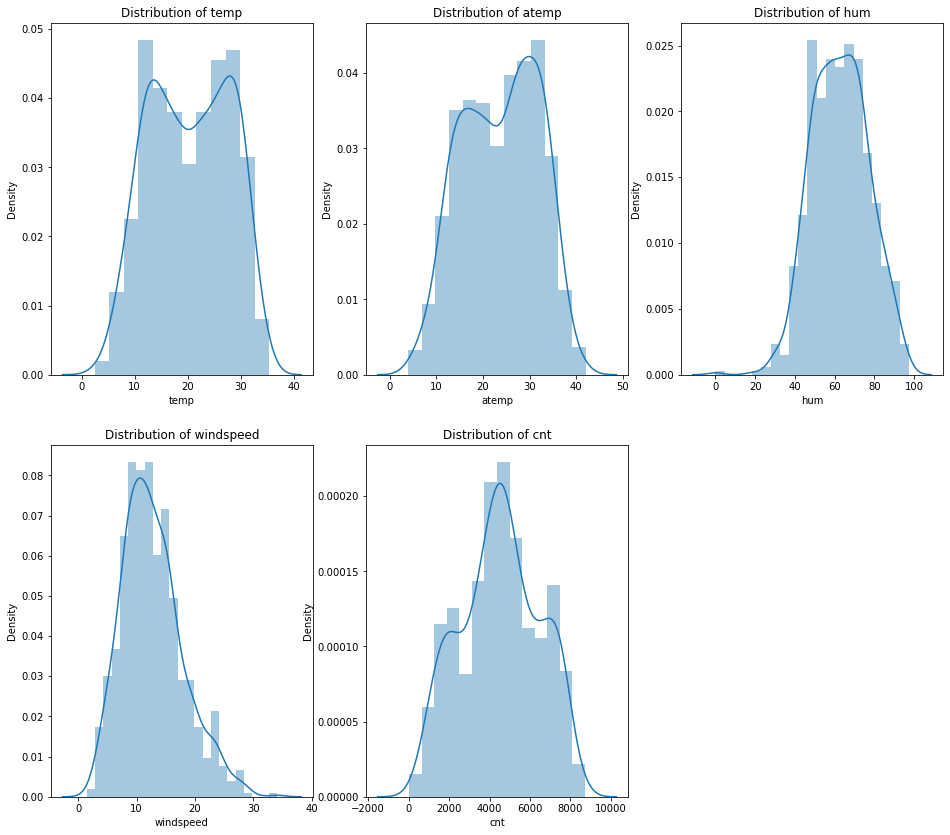

In [10]:
# Univariate Analysis for Continous variables

cont_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(16,22))
for i,v in enumerate(cont_vars):
    plt.subplot(3,3,i+1)
    sns.distplot(data[v])
    plt.title('Distribution of ' + v)
    plt.xlabel(v)
    plt.ylabel('Density')
plt.show()

- Temp and atemp shows similar distribution. 

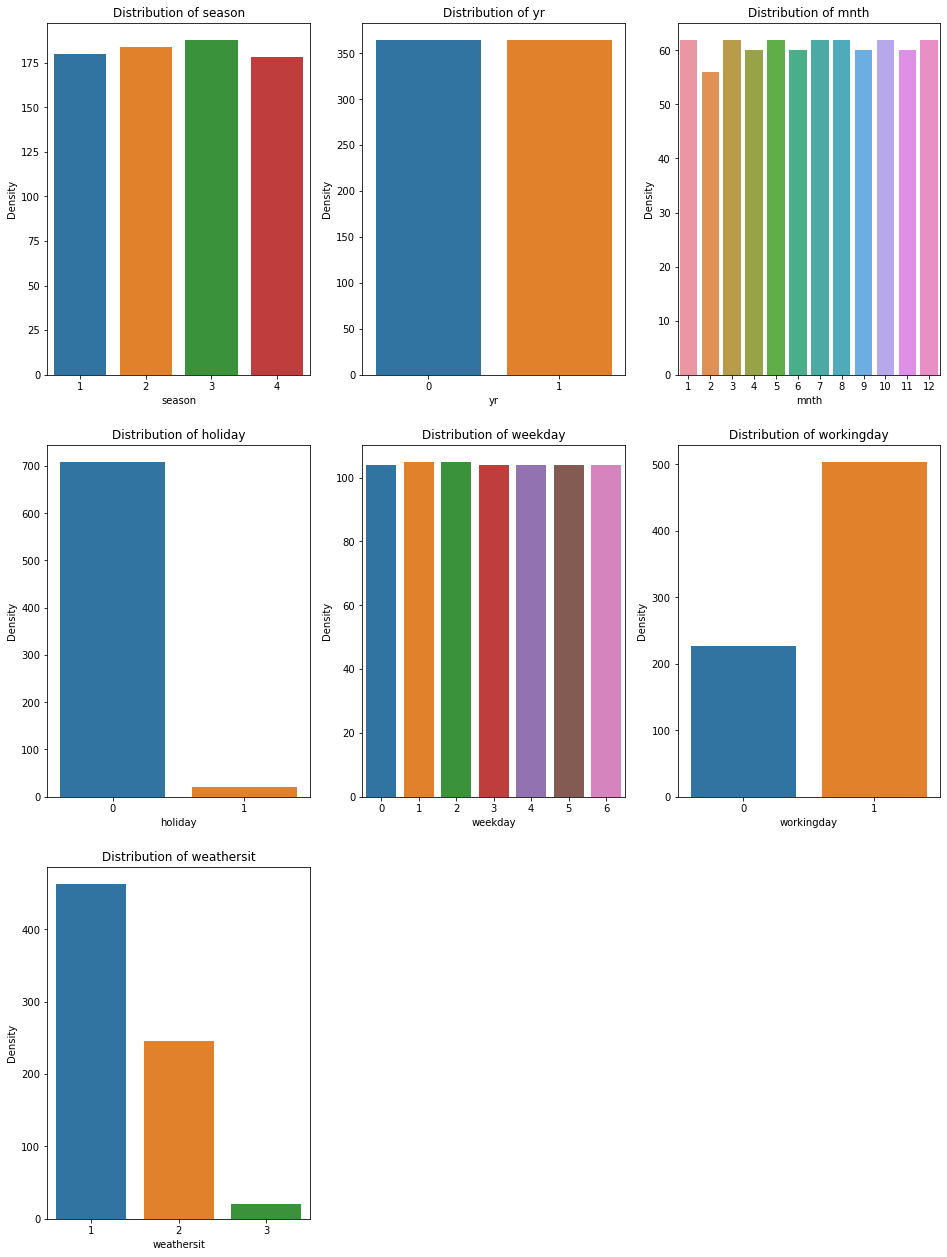

In [11]:
# Univariate Analysis for Categorical variables

cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(16,22))
for i,v in enumerate(cat_vars):
    plt.subplot(3,3,i+1)
    sns.countplot(data[v])
    plt.title('Distribution of ' + v)
    plt.xlabel(v)
    plt.ylabel('Density')
plt.show()

Inferences:
- we can see from here that the bikesharing only depends on weather conditions and working days / holidays
- People use the service mostly when the weather is Clear or there are Few clouds of its Partly cloudy
- its rare to not used on days when weather is snowy/misty or if its raining. 
- It's independant of seasons, years, month or weekday

### Bivariate Analysis

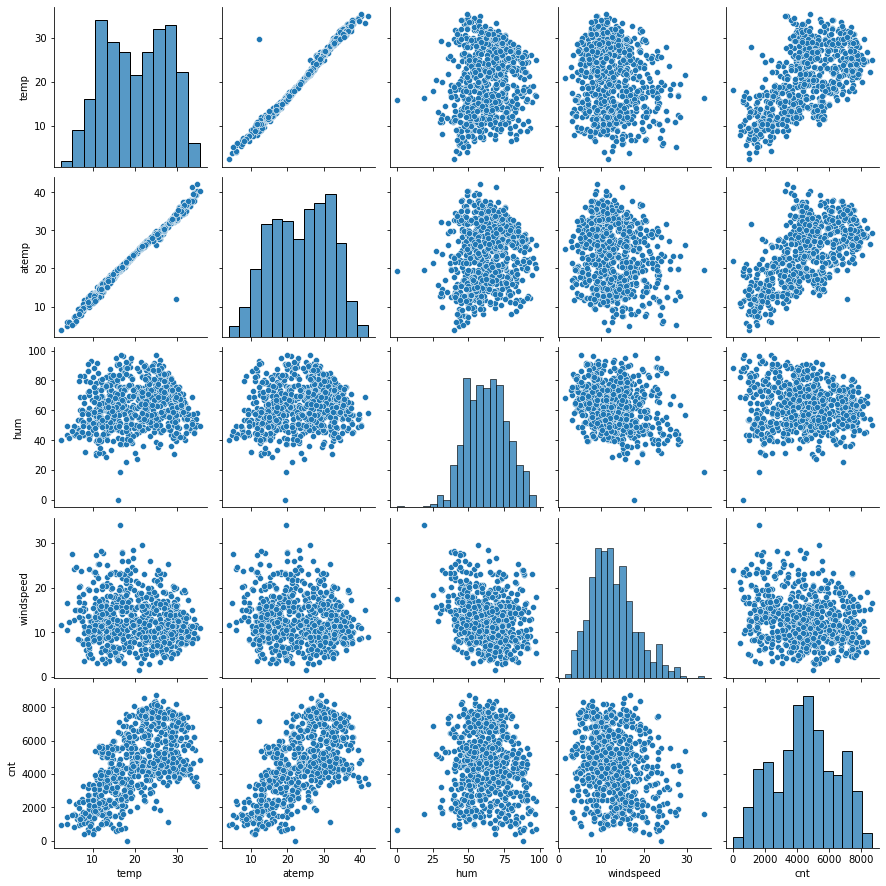

In [12]:
# Numerical - Numerical Analysis

sns.pairplot(data = data, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

Inferences:
- temp and atemp both seem to have some linear corelation with our output variable cnt. 
- we can see a very high linear relationship between 'temp' and 'atemp' variables. Clearly a case of multicollinearity. Its better we drop one of them.

In [13]:
# dropping 'atemp' variable
data.drop('atemp', axis=1, inplace=True)

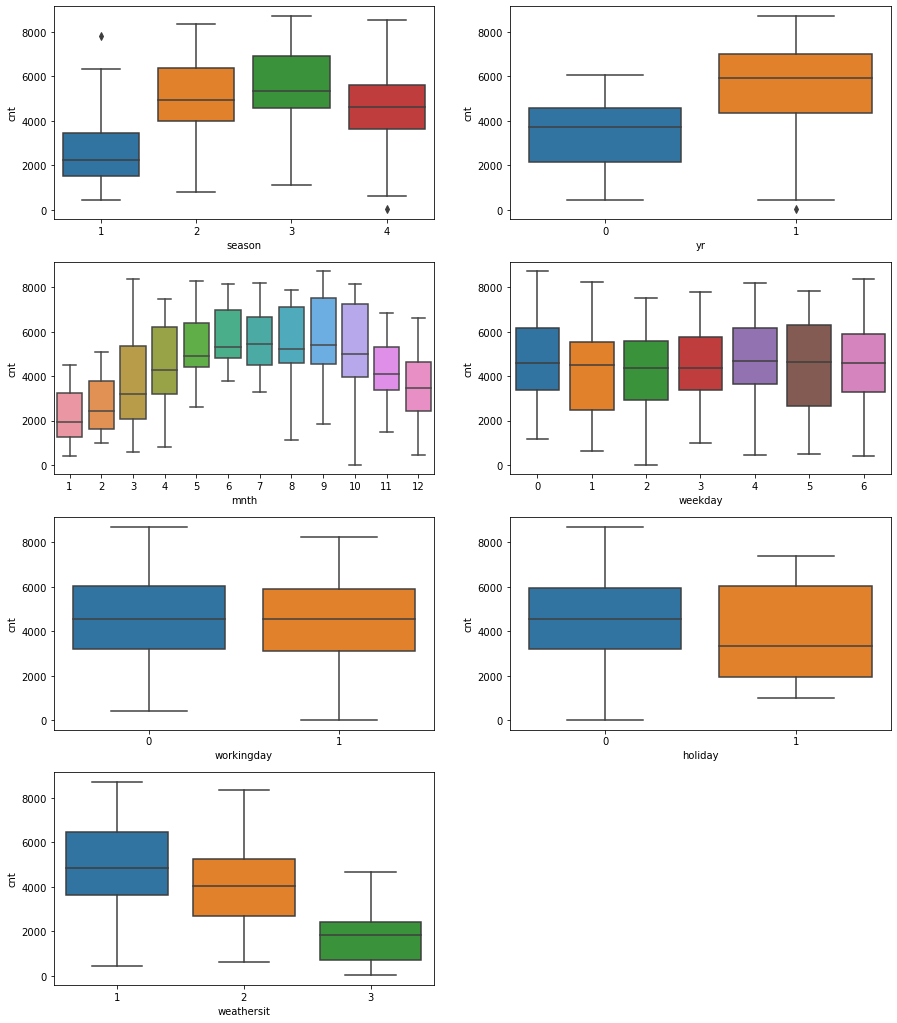

In [14]:
# Numerical - Categorical 
# using 'cnt' as our Target variable, let's perform some bivariate analysis on Categorical variables

vars_cat = ['season','yr','mnth','weekday','workingday', 'holiday' ,'weathersit']
plt.figure(figsize=(15, 18))
for i in enumerate(vars_cat):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=data, x=i[1], y='cnt')
plt.show()

Infernces:
- We can see from here that rental bikes are in most demand during spring season followed by summer
- Demand of bikesharing has increased significantly in 2019. So, clearly gaining popularity over the time. 
- There's an increasing demand for rental bikes till June. September has the highest demand. It then starts decreasing.
- Renting of bikes doesn't seem to have much effect over the weekdays.
- Holidays have decreased the demand a bit.
- Rental bikes are in demand depending upon the weather. It has the most demand when the weather is clear or has very few clouds.

## Step 3: Data Preparation

#### Creating Dummy Variables

'season' and 'weathersit' columns have more than two levels of categories. so we convert those levels into integers as well.

In [15]:
data = pd.get_dummies(data, columns = ['season', 'weathersit'], drop_first=True)
data.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,1,1,14.110847,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,2,1,14.902598,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,3,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,4,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,5,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0


## Step 4: Spliting the data into Training and Testing sets

In [16]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

### Feature Scaling


In [17]:
# Apply scaler() to all the columns except'bool' and 'dummy' variables

num_vars = ['temp', 'hum', 'windspeed', 'cnt', 'mnth', 'weekday']

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [18]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
367,1,0.000000,0,0.666667,1,0.113228,0.454701,0.695175,0.254717,0,0,0,0,0
648,1,0.818182,0,0.833333,1,0.468352,0.477458,0.299450,0.868385,0,0,1,0,0
44,0,0.090909,0,0.500000,1,0.443431,0.387290,0.807474,0.217556,0,0,0,0,0
705,1,1.000000,0,1.000000,0,0.326094,0.787463,0.189819,0.573631,0,0,1,1,0
379,1,0.000000,0,0.333333,1,0.133996,0.431945,0.449210,0.263346,0,0,0,0,0


In [19]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.504514,0.027397,0.491438,0.726027,0.537414,0.649499,0.319463,0.515792,0.246575,0.251712,0.250000,0.342466,0.027397
std,0.500241,0.316099,0.163378,0.324531,0.446377,0.225336,0.144219,0.168114,0.225336,0.431387,0.434369,0.433384,0.474941,0.163378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.340113,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.545191,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.736512,0.752361,0.410413,0.691872,0.000000,1.000000,0.250000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


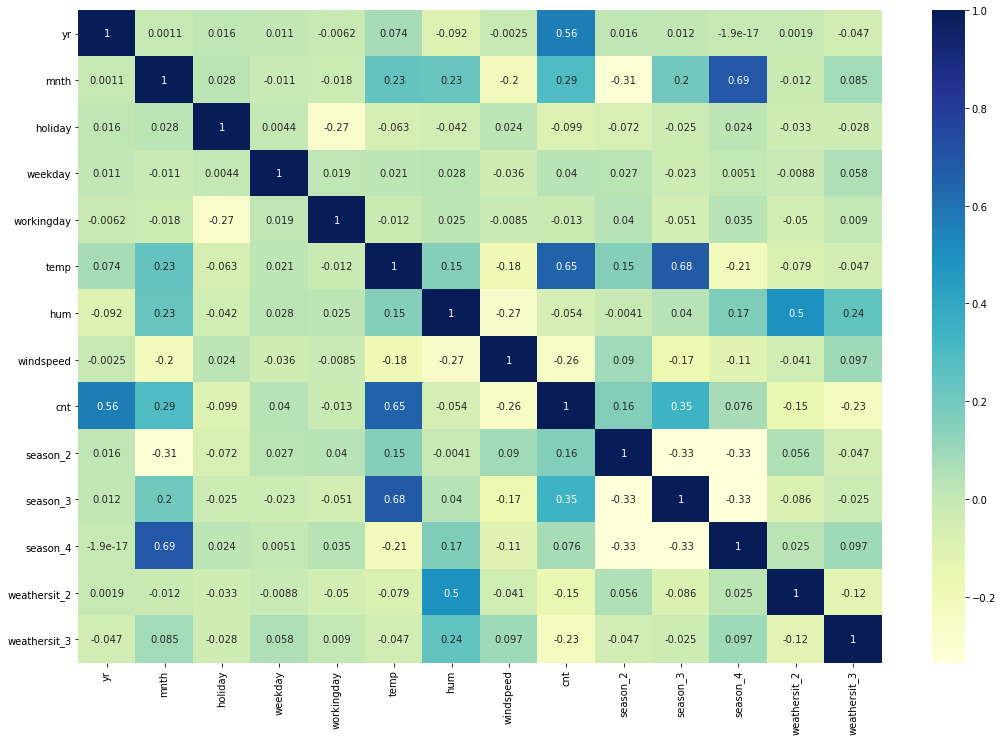

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (18, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- temp has the highest correlation with our Target variable cnt.

### Dividing into X and Y sets for the model building

In [21]:
# creating predictor and target training variable
y_train = df_train.pop('cnt')
X_train = df_train

In [22]:
print(y_train.shape)
print(X_train.shape)

(584,)
(584, 13)


## Step 5: Feature Selection using RFE - Automated Approach

In [23]:
# Now, we apply the linear regression model to our training data
# creating an object of Linear Regression
LR = LinearRegression()

# training the model without any feature elimination
LR.fit(X_train, y_train)

LinearRegression()

In [24]:
# predicting target variable

y_train_pred =  LR.predict(X_train)

In [25]:
#checking r2_score
r2_score(y_true= y_train, y_pred=y_train_pred)

0.8339851398949644

In [26]:
# using RFE(recursive feature elimination) to reduce the dimension of data

rfe = RFE(LR, 10)
rfe = rfe.fit(X_train,y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', True, 1),
 ('weekday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [28]:
# columns to choose for training the data

col_train = X_train.columns[rfe.support_]
col_train

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

- Using RFE - Automated approach, we have now selected 10 variables which can be now used for model building

## Step 6: Model Building using Statsmodels

### Model 1

In [29]:
#creating training data
X_train_rfe = X_train[col_train]

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm1 = sm.OLS(y_train, X_train_lm).fit()


In [30]:
# Print a summary of the linear regression model obtained
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     282.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          3.71e-214
Time:                        21:52:14   Log-Likelihood:                 562.08
No. Observations:                 584   AIC:                            -1102.
Df Residuals:                     573   BIC:                            -1054.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2053      0.026      7.761   

Inference on Model 1:
- p values of all the variable coefficients are below 0.05 so we can say they are all significant
- Let us now check for the VIF values

In [31]:
# Checking VIF (Variance Inflation Factor)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,22.34
3,hum,14.88
6,season_3,6.20
4,windspeed,3.66
5,season_2,3.46
7,season_4,2.51
8,weathersit_2,2.12
0,yr,2.03
9,weathersit_3,1.16
1,holiday,1.04


- We want the VIF values to be below 5. Clearly we need to drop some variables
- temp has the highest vif value but it also has the highest linear relationship between our target variable.
- 'hum' has 2nd highest vif value so we will remove 'hum' variable

In [32]:
#removing 'hum' variable from dataset

X_train_rfe.drop(['hum'], axis=1, inplace=True)

### Model 2

In [33]:
# creating our 2nd model after dropping variable 'hum'

#adding constant to variable
X_train_lm = sm.add_constant(X_train_rfe)

# Building 2nd model
lm2 = sm.OLS(y_train, X_train_lm).fit()


In [34]:
# Print a summary of the linear regression model obtained
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     305.5
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          2.32e-212
Time:                        21:52:14   Log-Likelihood:                 554.91
No. Observations:                 584   AIC:                            -1090.
Df Residuals:                     574   BIC:                            -1046.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1259      0.016      7.758   

In [35]:
# Checking VIF (Variance Inflation Factor)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,14.09
5,season_3,5.90
4,season_2,3.41
3,windspeed,3.23
6,season_4,2.43
0,yr,2.02
7,weathersit_2,1.47
8,weathersit_3,1.07
1,holiday,1.04


- We want the VIF values to be below 5. Clearly we need to drop some more variables
- season_3 has highest vif other than temp. So we will remove 'season_3' variable

In [36]:
#removing 'season_3' variable from dataset

X_train_rfe.drop(['season_3'], axis=1, inplace=True)

### Model 3

In [37]:
# creating our 3rd model after dropping variable 'season_3'

#adding constant to variable
X_train_lm = sm.add_constant(X_train_rfe)

# Building 3rd model
lm3 = sm.OLS(y_train, X_train_lm).fit()


In [38]:
# Print a summary of the linear regression model obtained
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     332.5
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          4.50e-210
Time:                        21:52:14   Log-Likelihood:                 546.54
No. Observations:                 584   AIC:                            -1075.
Df Residuals:                     575   BIC:                            -1036.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1116      0.016      6.948   

In [39]:
# Checking VIF (Variance Inflation Factor)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.368635
3,windspeed,3.009572
0,yr,1.996418
4,season_2,1.519264
6,weathersit_2,1.468950
5,season_4,1.372022
7,weathersit_3,1.069832
1,holiday,1.033851


- We now have vif values < 5 and p value <0.05 which means our model is significant
- Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
- Durbin watson statistic = 2.03 which means there's no autocorrelation in the dataset.

## Step 7: Residual Analysis of the train data

let us now check if the error terms are also normally distributed (which is one of the major assumptions of linear regression)
let us plot the histogram of the error terms and see what it looks like

In [40]:
y_train_pred = lm3.predict(X_train_lm)

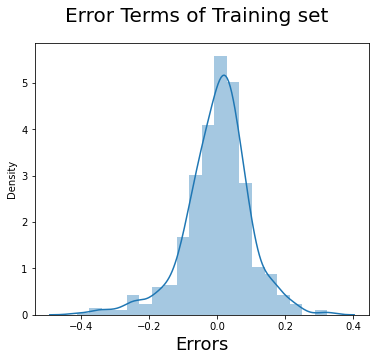

In [41]:
# Plot the histogram of the error terms

fig = plt.figure(figsize = (6,5))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms of Training set', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [42]:
# Error terms are normally distributed with mean 0

## Step 8 : Making Predictions using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 3rd model.

### Feature Scaling on test dataset

In [43]:
# Apply scaler() to all the columns except'bool' and 'dummy' variables

num_vars = ['temp', 'hum', 'windspeed', 'cnt', 'mnth', 'weekday']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [44]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.493773,0.034247,0.530822,0.547945,0.569603,0.635933,0.315127,0.517368,0.273973,0.280822,0.219178,0.315068,0.034247
std,0.498699,0.304597,0.182488,0.366198,0.499409,0.238088,0.156357,0.161524,0.212757,0.447530,0.450948,0.415114,0.466142,0.182488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.359075,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.560248,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.801929,0.730570,0.411976,0.649994,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [45]:
y_test = df_test.pop('cnt')
X_test = df_test

In [46]:
# Adding constant variable to test dataframe

X_test_m3 = sm.add_constant(X_test)

In [47]:
# Creating X_test_m3 dataframe by dropping variables from X_test_m3

X_test_m3 = X_test_m3.drop(['hum', 'season_3', 'mnth','weekday', 'workingday', ], axis = 1)

In [48]:
# Making predictions using the 3rd model

y_test_pred_m3 = lm3.predict(X_test_m3)

In [49]:
lm3

## Step 9: Model Evaluation

Let us now plot the graph for actual vs predicted values

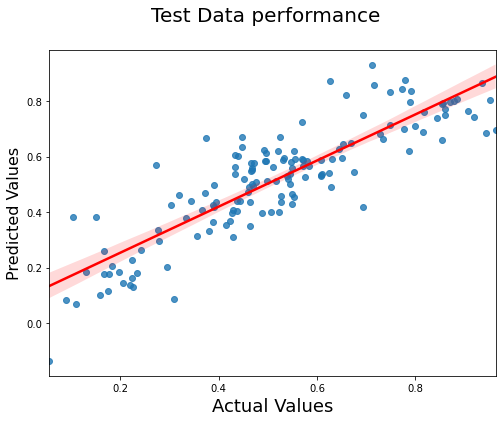

In [50]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure(figsize = (8,6))
sns.regplot(x= y_test, y= y_test_pred_m3, line_kws = {'color': 'red', 'linewidth' : 2.5})
fig.suptitle('Test Data performance', fontsize = 20)            
plt.xlabel('Actual Values', fontsize = 18)                      
plt.ylabel('Predicted Values', fontsize = 16)     
plt.show()

- Actual and predicted values seems to have a clear linear relationship

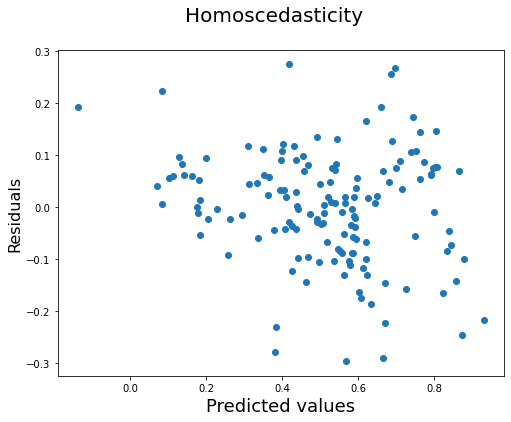

In [51]:
# Homoscedasticity 

resid = y_test - y_test_pred_m3

fig = plt.figure(figsize = (8,6))
plt.scatter(y_test_pred_m3, resid)
fig.suptitle('Homoscedasticity', fontsize = 20)            
plt.xlabel('Predicted values', fontsize = 18)                      
plt.ylabel('Residuals', fontsize = 16)     
plt.show()


- No clear pattern visible here. so our model seems to be decent.
- Error terms have homoscedasticity

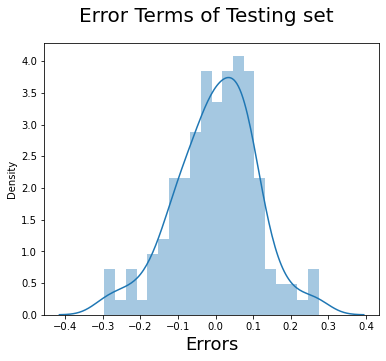

In [52]:
# Plot the histogram of the error terms

fig = plt.figure(figsize = (6,5))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms of Testing set', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)
plt.show()

- Error terms are normally distributed

In [53]:
# calculating R-squared score on predicted data on test dataset

r2_score_test = r2_score(y_test, y_test_pred_m3)
round(r2_score_test,3)


0.742

- The R-squared score on predicted data from test dataset is 0.742

In [54]:
# calculating R-squared score on predicted data on train dataset
r2_score_train = r2_score(y_train, y_train_pred)
round(r2_score_train,3)

0.822

In [55]:
# Calculate RMSE (root mean squared error) between actual and predicted values

from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(y_test, y_test_pred_m3)) 


0.10767324344921686

- The smaller the RMSE value, the better a model is able to fit the data. 
- Here our RMSE value is 0.1 which is a very low value, so we can conclude our model is a better fit to the data.

In [56]:
# Calculate MAE (mean absolute error) between actual and predicted values. 
# the mean absolute error (MAE) is a way to measure the accuracy of a given model.

from sklearn.metrics import mean_absolute_error as mae

#calculate MAE
mae(y_test, y_test_pred_m3)

0.08405750105994578

- This tells us that the average difference between the actual data value and the value predicted by the model is 0.08
- The lower the MAE for a given model, the more closely the model is able to predict the actual values.
- So once again, we can conclude that our model is a better fit to the data

#### Best FIt Line Equation
We can see the equation of our best fitted line is:

cnt = 0.112 + 0.229 x yr - 0.101 x holiday + 0.594 x temp - 0.158 x windspeed - 0.078 x season_2 + 0.136 x season_4 - 0.074 x weathersit_2 - 0.281 x weathersit_3


### Validation of 5 Assumptions of linear regression

- There is linear relationship between our Independant and Dependant variables. we concluded that from the pairplots.
- Error terms are normally distributed. we concluded that by plotting histogram of error terms
- Error Terms have Homoscedasticity. we concluded that from the scatter plot above
- There is no Auto correlation between variables. we concluded that from the Durbin watson Statistic on our final model. If the value is 2 means no autocorrelation. Our Final model 3 has a Durbin Watson score of 2.03 ~ 2
- There's no Multicollinearity between our Independant variables. we concluded this from the vif values from our final model. we have VIF<5

We can thus conclude our model is a best fit model as 
1. We have satisfied all our assumptions on the Linear Regression. 
2. Errors have zero mean
3. We calculated few statistical terms like R-squared values, F-statistic, p-values, RMSE, MAE and all these are within the acceptable range.

## Final inferences:
 
1. Company should focus more during the Spring season as there's a huge demand then.
2. company can expect good bookings when the weather conditions are nice i.e., clear sky, or when its partly cloudy.
3. The rental bikes sure are gaining more popularity. so once the Pandemic situation is settles down, company can expect good demand
4. Company can schedule the bike repairs, servicing etc during bad weather conditions as the demand would be low during that period and company wont incur into losses.
5. Company can expect low bookings during snow or heavy rain. 